# Exercício 05
## Planejamento de Experimentos
### Alunos:

 - Lucas Henrique Mantovani Jacintho - 10258942
 - Victor Luiz Fortes Rivelo - 9762960
 - Vinicius Henrique Borges - 9771546

---


## Objetivos da prática:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.


---

## Funções novas utilizadas no exercício

- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)






---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---


Após a análise dos dados e um pré-processamento vem a etapa de modelagem dos experimentos. Essa etapa pode requerer voltar no pré-processamento caso perceba-se que algo precisa ser feito. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Essa prática foca mais no processo de avaliação.
Para a avaliação é preciso definir qual a função de custo/erro adequada, e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado á escolha do algoritmo de classificação bem como a escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

Dada a introdução acima, já definimos que o tipo do problema é classificação. Defina quais os atributos você utilizará, e a medida de avaliação você acha adequada e explique o porquê dessas escolhas. Você também deve fazer nessa questão os pré-processamentos que achar necessário.

Lembre-se que o objetivo da classificação é fazer predições para dados não vistos, ou seja, quando o algoritmo for colocado em produção ele classificará corretamente amostras não vistas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()

In [ ]:
data = np.c_[dataset.data, dataset.target]
columns = dataset.feature_names.tolist() + ['class']

df = pd.DataFrame(data, columns=columns)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df['class'].value_counts()

1.0    357
0.0    212
Name: class, dtype: int64

Com essa visualização, já é possível observar algumas coisas:
1. Não possuem valores faltantes, então não será necessário tratar esse aspecto.
2. Existe grande variação de escala entre atributos, o que pode prejudicar o desempenho dos modelos. Portanto, realizaremos a normalização dos dados antes de utilzá-los.
3. Existe algum desbalanceamento na quantidade de exemplos entre as classes. Como não queremos perder informação de exemplos positivos, realizaremos o oversampling da classe negativa.

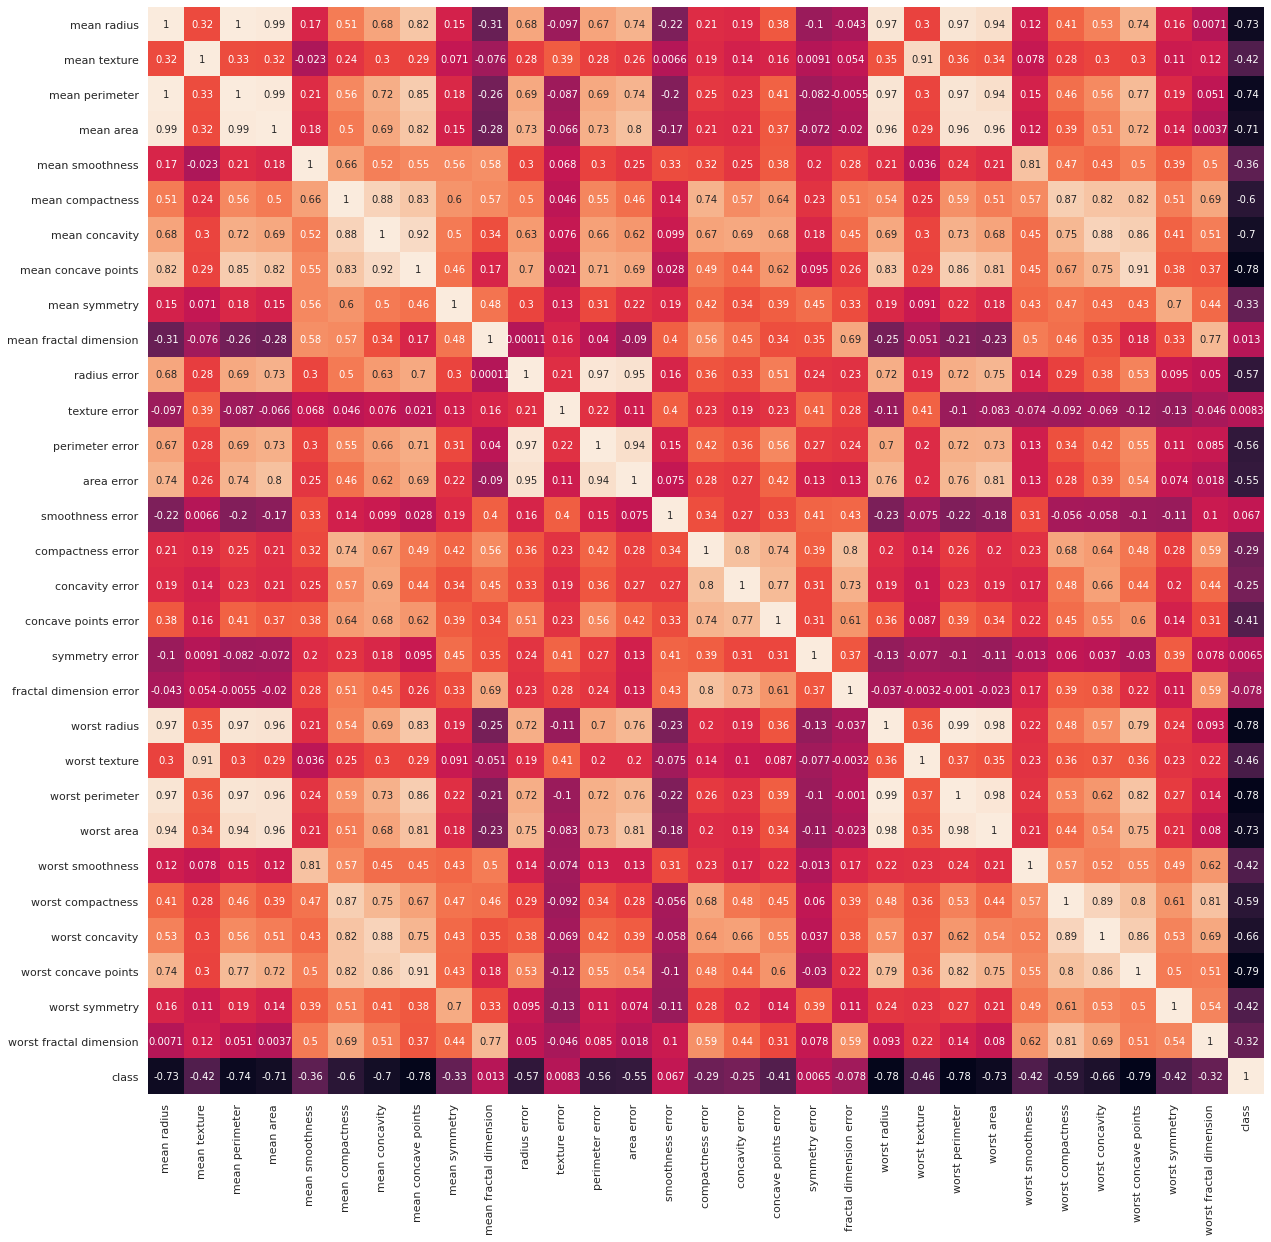

In [ ]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cbar=False);

In [ ]:
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]
class_0_samples = class_0.sample(class_1.shape[0], replace=True)

oversampled_data = pd.concat((class_0_samples, class_1))
oversampled_data['class'].value_counts()

1.0    357
0.0    357
Name: class, dtype: int64

In [ ]:
X = oversampled_data.iloc[:, :-1]
y = oversampled_data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
scaled_X = scale(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(scaled_X)
pca.explained_variance_ratio_.cumsum()

array([0.44712233, 0.63596566, 0.73321059, 0.79735654, 0.84695962,
       0.88755941, 0.91201359, 0.92756938, 0.9408543 , 0.95222663,
       0.96177735, 0.97065522, 0.97870231, 0.98375272, 0.98696115,
       0.98947581, 0.99158123, 0.99325826, 0.99482895, 0.9958883 ,
       0.99689109, 0.99774542, 0.99849709, 0.99900162, 0.99947433,
       0.99973468, 0.99992776, 0.99997137, 0.99999539, 1.        ])

Pelo resultado do PCA, podemos utilizar 7 componentes e permanecer com mais de 90% da variância dos dados.

Para o estimador de desempenho o grupo decidiu utilizar a métrica *recall*, ou seja, a porcentagem de casos com câncer que foram corretamente preditas pelo modelo. Essa escolha baseia-se em um cenário real onde importância de salvar vidas humanas é maior do que o gasto adicional de realizar mais exames que confirmem a existência do câncer. Em outras palavras, uma classificação falsamente negativa poderia desincentivar uma pessoa doente a buscar tratamento; enquanto uma classificação falsamente positiva poderia, no pior dos casos, fazer com que uma pessoa saudável realize exames adicionais para confirmar (ou não) a suspeita.

In [ ]:
X_data = pca_data[:, :7]
full_data = pd.DataFrame(np.c_[X_data, y])



---

### Questão 02.
Uma boa prática é escolher modelos mais simples, dados dois modelos com desempenho similar a escolha do mais simples é indicada pois com isso há algumas garantias de melhor generalização. Generalização, de maneira geral, é a propriedade que garante que o classificador terá desempenho parecido ao reportado no teste.

A definição da complexidade de um modelo nem sempre é uma tarefa fácil. Uma maneira de tentar mensurar isso é através do número de parâmetros do modelo, do tipo de função que ele implementa (linear ou não linear, cortes ortogonais no espaço, ...), ou da chamada dimensão VC (Vapnik-Chervonenkis) do classificador. A dimensão VC é um tópico mais avançado e faz parte da chamada teoria do aprendizado estatístico, ela é citada aqui apenas como curiosidade não é esperado que saibem sobre isso.

Execute a função *classificacao* definida no notebook com a medida de desempenho que você definiu. Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt


def classificacao(data, columns, target, score=balanced_accuracy_score, score_name='acurácia', 
                  folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    #Inicializa estruturas para matrizes de confusão 
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }

    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
            confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)        
    
    if not plot:
        return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

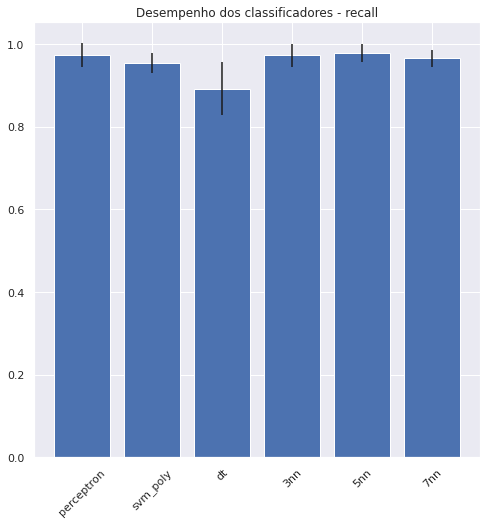

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=7140, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=71,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [ ]:
from sklearn.metrics import recall_score

n_columns = full_data.shape[1]
columns = [i for i in range(n_columns-1)]
target = n_columns - 1

classificacao(full_data, columns, target, score=recall_score, score_name='recall')

O Algoritmo de melhor resultado é o KNN contendo 3 camadas, a conclusão vem da análise do resultados de true positive da confusion_matrices


---

### Questão 03.

Utilizar os 3 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;
- Boostrap (1000 amostras de boostrap).

Para o dataset escolhido, executar os 3 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Para o 10-fold Cross Validation e o leave-one-out, você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.
  * Já para o boostrap, você vai precisar implementar a função classificação modificada `classificacao_bootstrap`. A seção de interesse que vocês precisarão modificar está destacada na função. No cálculo do bootstrap utilize 80% do dataset para treino e 20% para teste.

Essas execuções podem demorar um pouco, então tenham paciência.

**No material complementar há exemplos de como fazer o bootstrap**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


def classificacao_bootstrap(data, columns, target, score=balanced_accuracy_score, no_bs=1000, p_teste=0.2, score_name='acurácia', plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    no_bs:      Número de repetições do bootstrap
    p_teste:    Porcentagem para teste da amostra do bootstrap
    score_name: String. Uma string com o nome da medida de desempenho    
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
      for i in range(0, no_bs):
        ################# IMPLEMENTE ABAIXO O BOOTSTRAP #######################
        #    Sua implementação deve fazer o append no vetor results da mesma 
        #    forma que a implementação original faz.
        #    Dentro desse loop:
        #     c: variável-objeto que representa o classificador
        #     c_name: Nome do classificador
        #     results: vetor de resultado
        #######################################################################
        no_examples = data.shape[0]
        sample = data.sample(n=no_examples, replace=True) # Obtendo amostra do bootstrap
    
        X = sample.iloc[:, :-1] # Separando em dados 
        y = sample.iloc[:, -1]  # e variável alvo
      
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p_teste) # Split dos dados
      
        c.fit(X_train, y_train)  
        y_pred = c.predict(X_test)
        results[c_name].append(score(y_test, y_pred))

        #######################################################################
        
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

#### 10-Fold

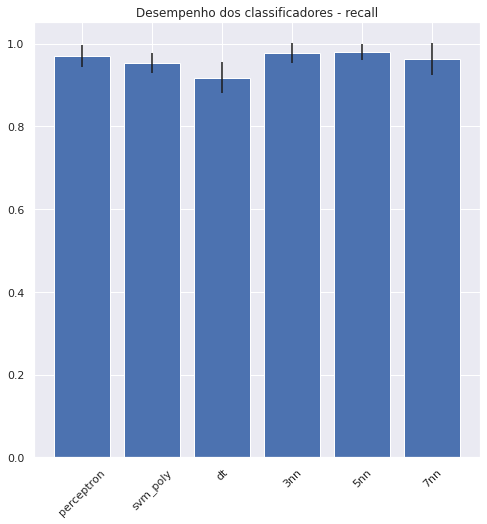

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=7140, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=71,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [ ]:
classificacao(full_data, columns, target, score=recall_score, score_name='recall', folds=10)

#### Leave One Out

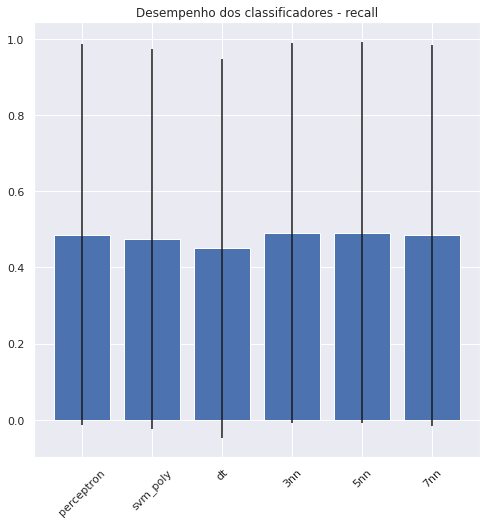

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=7140, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=71,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [ ]:
n_samples = full_data.shape[0]

classificacao(full_data, columns, target, score=recall_score, score_name='recall', folds=n_samples)

#### Bootstrap

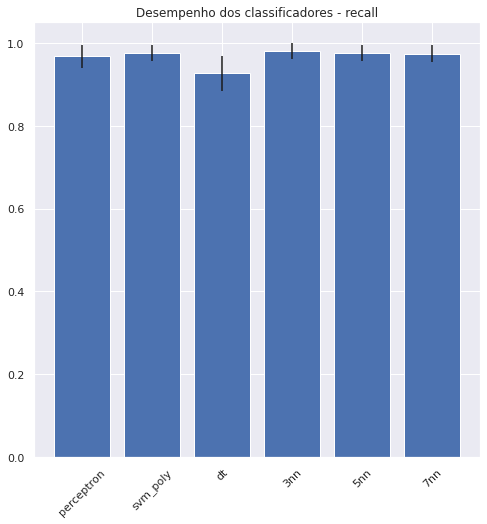

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=7140, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=71,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [ ]:
classificacao_bootstrap(full_data, columns, target, score=recall_score, score_name='recall')



---

### Questão 04.

Utilizando o 10-fold cross validation, calcule as medidas de avaliação baseadas na matriz de confusão (TFP, TFN, TVN, TVP). Como em meio a tantas medidas de avaliação, comparar os classificadores? Como escolher o melhor?

In [ ]:
answ = classificacao(full_data, columns, target, score=recall_score, score_name='recall', folds=10, plot=False)

answ['confusion_matrices']['3nn']

for i in(answ['confusion_matrices']):
  TVP = answ['confusion_matrices'][i][0][0]
  TFN = answ['confusion_matrices'][i][1][0]
  TFP = answ['confusion_matrices'][i][0][1]
  TVN = answ['confusion_matrices'][i][1][1]
  Precision = TVP/(TVP+TFP)
  Recall = TVP/(TVP+TFN)
  Accuracy = (TVP + TVN)/full_data.shape[0]
  F1_Score = (2*Precision*Recall)/(Recall+Precision)
  print('-------Modelo ', i ,'-------')
  print('Precision', Precision )
  print('Recall', Recall )
  print('Accuracy', Accuracy )
  print('F1_Score', F1_Score )
  print('')
  

-------Modelo  perceptron -------
Precision 0.969187675070028
Recall 0.9719101123595506
Accuracy 0.9705882352941176
F1_Score 0.9705469845722301

-------Modelo  svm_poly -------
Precision 0.9831932773109243
Recall 0.9538043478260869
Accuracy 0.9677871148459384
F1_Score 0.9682758620689654

-------Modelo  dt -------
Precision 0.9299719887955182
Recall 0.9352112676056338
Accuracy 0.9327731092436975
F1_Score 0.9325842696629214

-------Modelo  3nn -------
Precision 0.969187675070028
Recall 0.9801699716713881
Accuracy 0.9747899159663865
F1_Score 0.9746478873239437

-------Modelo  5nn -------
Precision 0.9551820728291317
Recall 0.9798850574712644
Accuracy 0.9677871148459384
F1_Score 0.9673758865248228

-------Modelo  7nn -------
Precision 0.9523809523809523
Recall 0.9686609686609686
Accuracy 0.9607843137254902
F1_Score 0.9604519774011299



As medidas de avaliação são uma forma de interpretar as respostas obtidas da matriz de confusão, ou seja para cada problema teremos uma métrica que trará os melhores resultados, por exemplo para o caso do problema de câncer o recall é imprescindível.

Segundo o material disponível em: https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20is%20used%20when%20the,as%20in%20the%20above%20case

Podemos verificar algumas das nossas medidas de avaliação, e os casos onde é importante o foco da análise, com base na característica do problema.

- A precisão é usada quando os Verdadeiros Positivos e Verdadeiros negativos são mais importantes

- A pontuação da F1 é usada quando os Falsos Negativos e Falsos Positivos são cruciais

- A precisão pode ser usada quando a distribuição da classe é semelhante 

- A pontuação da F1 é uma métrica melhor quando há classes desequilibrados como no caso acima.

- Na maioria dos problemas de classificação da vida real, a distribuição de classes desequilibrada existe e, portanto, a pontuação da F1 é uma métrica melhor para avaliar nosso modelo.

Dada a explicação breve acima, para escolhermos o melhor classificador devemos analisar sua performance sob a medida de análise que trará maiores ganhos ao problema definido para sua escolha. 